# Final Project for COGS 108 - Professor Bradley Voytek

### Topic - Parking Citations

 Team Members :
 - A10462780 - Jimmy Martinez
 - A11721951 - Karla Avila
 - A98033117 - Ronke Odubela
 - A99133387 - Lenny Luc

# Introduction and Background:

Write Stuff Here

# Data Description:

Write Stuff here...

# Data Cleaning/Pre-processing:

In [1]:
# Imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind

import scipy.stats as stats
from scipy.stats import normaltest
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from sklearn.decomposition import PCA

In [2]:
# Loading data (loading the sample containing the first 1000 entries only)
df = pd.read_csv('parking_citation_samples.csv')
df

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,79764791,9RX368,0,11,WV,INFIN,6000 CHINQUAPIN PKWY,19,Exceeding 48 Hours,$32.00,...,$332.00,NaN,$32.00,$300.00,10/31/2011,05/09/2013 04:03:00 AM +0000,NaN,NaN,NaN,"6000 CHINQUAPIN PKWY\nBaltimore, MD\n(39.36509..."
1,79799128,00T058,6,11,MD,GMC,O/S 3600 GLENGYLE AVENUE,22,Expired Tags,$32.00,...,$332.00,NaN,$32.00,$300.00,1/4/2012,08/09/2013 04:03:00 AM +0000,NaN,NaN,NaN,"3600 GLENGYLE AVENUE\nBaltimore, MD\n(39.36725..."
2,79741567,6926L6,3,13,MD,FORD,1000 VINE ST,18,All Other Parking Meter Violations,$32.00,...,$357.00,NaN,$32.00,$325.00,10/19/2011,05/09/2013 04:03:00 AM +0000,NaN,NaN,NaN,"1000 VINE ST\nBaltimore, MD\n(39.290402, -76.6..."
3,79751210,1FZL87,5,10,MD,HOND,4200 CONNECTICUT AVE,22,Expired Tags,$32.00,...,$332.00,NaN,$32.00,$300.00,8/31/2011,05/07/2013 10:41:00 AM +0000,Irvington,Southwestern,8.0,"4200 CONNECTICUT AVE\nBaltimore, MD\n(39.28429..."
4,79751160,TW2578,SEP,10,VA,MERC,4640 COLEHERNE RD,22,Expired Tags,$32.00,...,$332.00,NaN,$32.00,$300.00,12/29/2011,07/09/2013 04:02:00 AM +0000,NaN,NaN,NaN,"4640 COLEHERNE RD\nBaltimore, MD\n(39.294882, ..."
5,79798658,43638M9,9,11,MD,FORD,7027 SURREY DRIVE,22,Expired Tags,$32.00,...,$332.00,NaN,$32.00,$300.00,11/30/2011,06/11/2013 04:02:00 AM +0000,NaN,NaN,NaN,"7027 SURREY DRIVE\nBaltimore, MD\n(39.363243, ..."
6,79772844,22517M7,10,12,MD,DODG,2312 ARUNAH AVE,22,Expired Tags,$32.00,...,$357.00,NaN,$32.00,$325.00,11/23/2011,06/11/2013 04:02:00 AM +0000,Evergreen Lawn,Western,9.0,"2312 ARUNAH AVE\nBaltimore, MD\n(39.295575, -7..."
7,97623889,60336CE,2,15,MD,ACURA,2600 FLEET ST,22,Expired Tags,$32.00,...,$0.00,NaN,$0.00,$0.00,8/31/2016,09/28/2016 04:02:00 AM +0000,Canton,Southeastern,1.0,"2600 FLEET ST\nBaltimore, MD\n(39.285117, -76...."
8,94257863,8AH7007,6,16,MD,FORD,3200 ST PAUL ST,18,All Other Parking Meter Violations,$32.00,...,$357.00,NaN,$32.00,$233.00,9/16/2015,10/12/2016 04:02:00 AM +0000,NaN,NaN,NaN,"3200 ST PAUL ST\nBaltimore, MD\n(39.326916, -7..."
9,79767737,2AJ4955,8,11,MD,HOND,2413 ARUNAH AV,22,Expired Tags,$32.00,...,$332.00,NaN,$32.00,$300.00,10/26/2011,05/09/2013 04:03:00 AM +0000,NaN,NaN,NaN,"2413 ARUNAH AV\nBaltimore, MD\n(39.295532, -76..."


In [3]:
# Drop columns that are not relevant (address, citation, neighboorhood, importDate, policeDistrict, councilDistrict, Location, etc)

df.drop(['Tag', 'ExpMM','ExpYY','State','Make','Address','ViolFine','ViolDate','Balance', 'PenaltyDate','OpenFine','OpenPenalty','NoticeDate','PoliceDistrict','CouncilDistrict','Location'], axis=1, inplace=True)
df

,Citation,ViolCode,Description,ViolTime,DayTime,ImportDate,Neighborhood
0,79764791,19,Exceeding 48 Hours,11:18:00,AM,05/09/2013 04:03:00 AM +0000,NaN
1,79799128,22,Expired Tags,11:54:00,AM,08/09/2013 04:03:00 AM +0000,NaN
2,79741567,18,All Other Parking Meter Violations,8:57:00,PM,05/09/2013 04:03:00 AM +0000,NaN
3,79751210,22,Expired Tags,9:15:00,AM,05/07/2013 10:41:00 AM +0000,Irvington
4,79751160,22,Expired Tags,9:45:00,AM,07/09/2013 04:02:00 AM +0000,NaN
5,79798658,22,Expired Tags,11:09:00,PM,06/11/2013 04:02:00 AM +0000,NaN
6,79772844,22,Expired Tags,9:52:00,AM,06/11/2013 04:02:00 AM +0000,Evergreen Lawn
7,97623889,22,Expired Tags,1:05:00,PM,09/28/2016 04:02:00 AM +0000,Canton
8,94257863,18,All Other Parking Meter Violations,1:43:00,PM,10/12/2016 04:02:00 AM +0000,NaN
9,79767737,22,Expired Tags,12:40:00,PM,05/09/2013 04:03:00 AM +0000,NaN


In [4]:
# Remove any rows with NaNs

df_nbhood = df.dropna()
df_nbhood

,Citation,ViolCode,Description,ViolTime,DayTime,ImportDate,Neighborhood
3,79751210,22,Expired Tags,9:15:00,AM,05/07/2013 10:41:00 AM +0000,Irvington
6,79772844,22,Expired Tags,9:52:00,AM,06/11/2013 04:02:00 AM +0000,Evergreen Lawn
7,97623889,22,Expired Tags,1:05:00,PM,09/28/2016 04:02:00 AM +0000,Canton
16,79758553,19,Exceeding 48 Hours,1:28:00,AM,05/07/2013 10:41:00 AM +0000,Panway/Braddish Avenue
21,2886588,12,No Stopping/Standing Not Tow-Away Zone,12:20:00,PM,12/31/2016 04:02:00 AM +0000,Perkins Homes
24,79770491,1,Abandonded Vehicle,10:03:00,AM,10/12/2016 04:02:00 AM +0000,Gwynns Falls
34,97623640,1,Abandonded Vehicle,12:00:00,PM,08/16/2016 04:02:00 AM +0000,Howard Park
35,79705232,26,No Stop/Park Handicap,12:21:00,AM,03/02/2016 04:02:00 AM +0000,Harwood
43,94249548,27,No Stop/Park Street Cleaning,9:40:00,AM,10/12/2016 04:02:00 AM +0000,Edmondson Village
49,79805263,22,Expired Tags,1:40:00,PM,08/09/2013 04:03:00 AM +0000,Howard Park


In [5]:
# make data frame holding the date given without the time
df_date = df
df_date = df_date.drop('ViolTime', axis=1)
df_date = df_date.drop('DayTime', axis=1)
df_date = df_date.drop('Neighborhood', axis=1)
df_date

,Citation,ViolCode,Description,ImportDate
0,79764791,19,Exceeding 48 Hours,05/09/2013 04:03:00 AM +0000
1,79799128,22,Expired Tags,08/09/2013 04:03:00 AM +0000
2,79741567,18,All Other Parking Meter Violations,05/09/2013 04:03:00 AM +0000
3,79751210,22,Expired Tags,05/07/2013 10:41:00 AM +0000
4,79751160,22,Expired Tags,07/09/2013 04:02:00 AM +0000
5,79798658,22,Expired Tags,06/11/2013 04:02:00 AM +0000
6,79772844,22,Expired Tags,06/11/2013 04:02:00 AM +0000
7,97623889,22,Expired Tags,09/28/2016 04:02:00 AM +0000
8,94257863,18,All Other Parking Meter Violations,10/12/2016 04:02:00 AM +0000
9,79767737,22,Expired Tags,05/09/2013 04:03:00 AM +0000


In [6]:
# Get dataframe with just citations given in PM time
df_pm = df
df_pm = df_pm[df_pm.DayTime != 'AM']
df_pm

,Citation,ViolCode,Description,ViolTime,DayTime,ImportDate,Neighborhood
2,79741567,18,All Other Parking Meter Violations,8:57:00,PM,05/09/2013 04:03:00 AM +0000,NaN
5,79798658,22,Expired Tags,11:09:00,PM,06/11/2013 04:02:00 AM +0000,NaN
7,97623889,22,Expired Tags,1:05:00,PM,09/28/2016 04:02:00 AM +0000,Canton
8,94257863,18,All Other Parking Meter Violations,1:43:00,PM,10/12/2016 04:02:00 AM +0000,NaN
9,79767737,22,Expired Tags,12:40:00,PM,05/09/2013 04:03:00 AM +0000,NaN
10,79742003,1,Abandonded Vehicle,10:10:00,PM,10/12/2016 04:02:00 AM +0000,NaN
11,97623855,18,All Other Parking Meter Violations,12:03:00,PM,10/12/2016 04:02:00 AM +0000,NaN
14,94255214,18,All Other Parking Meter Violations,7:50:00,PM,09/10/2015 04:02:00 AM +0000,NaN
15,79749198,19,Exceeding 48 Hours,1:10:00,PM,05/07/2013 10:41:00 AM +0000,NaN
21,2886588,12,No Stopping/Standing Not Tow-Away Zone,12:20:00,PM,12/31/2016 04:02:00 AM +0000,Perkins Homes


In [7]:
# Get dataframe with just citations given in AM time
df_am = df
df_am = df_am[df_am.DayTime != 'PM']
df_am

,Citation,ViolCode,Description,ViolTime,DayTime,ImportDate,Neighborhood
0,79764791,19,Exceeding 48 Hours,11:18:00,AM,05/09/2013 04:03:00 AM +0000,NaN
1,79799128,22,Expired Tags,11:54:00,AM,08/09/2013 04:03:00 AM +0000,NaN
3,79751210,22,Expired Tags,9:15:00,AM,05/07/2013 10:41:00 AM +0000,Irvington
4,79751160,22,Expired Tags,9:45:00,AM,07/09/2013 04:02:00 AM +0000,NaN
6,79772844,22,Expired Tags,9:52:00,AM,06/11/2013 04:02:00 AM +0000,Evergreen Lawn
12,79776779,20,Passenger Loading Zone,10:39:00,AM,08/09/2013 04:03:00 AM +0000,NaN
13,79752994,22,Expired Tags,6:29:00,AM,05/07/2013 10:41:00 AM +0000,NaN
16,79758553,19,Exceeding 48 Hours,1:28:00,AM,05/07/2013 10:41:00 AM +0000,Panway/Braddish Avenue
17,97623830,18,All Other Parking Meter Violations,11:59:00,AM,08/25/2016 04:02:00 AM +0000,NaN
18,96191615,18,All Other Parking Meter Violations,11:00:00,AM,10/07/2016 04:02:00 AM +0000,NaN


# Data Visualization:

In [8]:
# Plot data with a scatter matrix

#CODE HERE

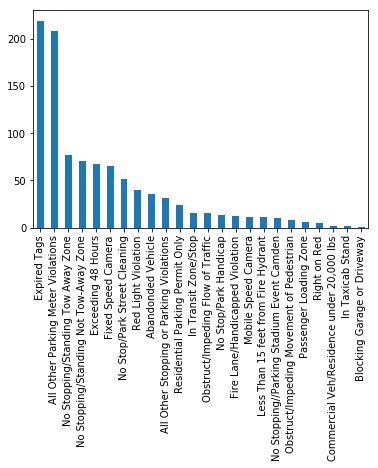

In [9]:
# Plot bar graph of description and/or violation code

#CODE HERE
bar_violcode = df['ViolCode'].value_counts().plot(kind='bar')
bar_violdescription = df['Description'].value_counts().plot(kind='bar')
bar_violcode
bar_violdescription

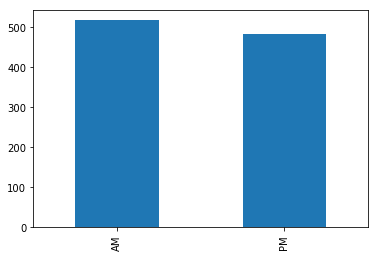

In [10]:
# Plot bar graph of number of tickets given in AM time vs PM time
df['DayTime'].value_counts().plot(kind='bar')

f1 = plt.gcf()

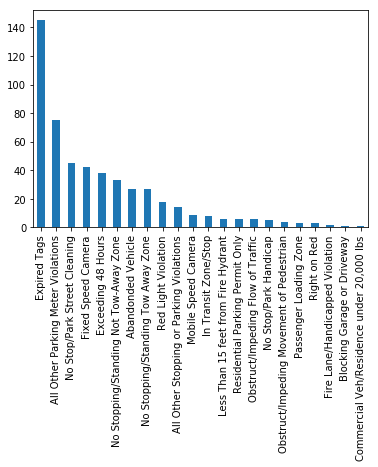

In [11]:
# Plot bar graph of description and/or violation code
# incluldes fines given ONLY during AM time

df_am['Description'].value_counts().plot(kind='bar')

f1 = plt.gcf()

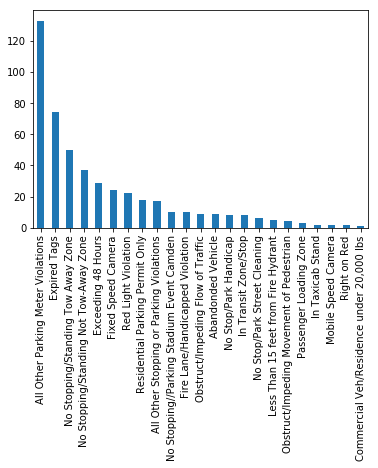

In [12]:
# Plot bar graph of description and/or violation code
# incluldes fines given ONLY during PM time

df_pm['Description'].value_counts().plot(kind='bar')

f1 = plt.gcf()

In [13]:
# Get all the values of amount of tickets given in each hour of the day
df.ViolTime = df.ViolTime.astype(str)
df.DayTime = df.DayTime.astype(str)

# array to hold times
times = np.array([0]*24)

i = 0

# loop through all the times on the dataframe
for list in df.ViolTime:
    if(df.DayTime[i][0] == 'A'):
        
        if(df.ViolTime[i][2] == ':'):
            if(df.ViolTime[i][1] == '0'):
                times[10] = times[10] + 1
            
            if(df.ViolTime[i][1] == '1'):
                times[11] = times[11] + 1
        
            if(df.ViolTime[i][1] == '2'):
                times[0] = times[0] + 1 
    
        else:
            if(df.ViolTime[i][0] == '1'):
                times[1] = times[1] + 1
        
            if(df.ViolTime[i][0] == '2'):
                times[2] = times[2] + 1  
    
            if(df.ViolTime[i][0] == '3'):
                times[3] = times[3] + 1
    
            if(df.ViolTime[i][0] == '4'):
                times[4] = times[4] + 1 
    
            if(df.ViolTime[i][0] == '5'):
                times[5] = times[5] + 1
    
            if(df.ViolTime[i][0] == '6'):
                times[6] = times[6] + 1 
        
            if(df.ViolTime[i][0] == '7'):
                times[7] = times[7] + 1
    
            if(df.ViolTime[i][0] == '8'):
                times[8] = times[8] + 1 
        
            if(df.ViolTime[i][0] == '9'):
                times[9] = times[9] + 1 
   
    else:
        
        if(df.ViolTime[i][2] == ':'):
            if(df.ViolTime[i][1] == '0'):
                times[22] = times[22] + 1
            
            if(df.ViolTime[i][1] == '1'):
                times[23] = times[23] + 1
        
            if(df.ViolTime[i][1] == '2'):
                times[12] = times[12] + 1 
    
        else:
            if(df.ViolTime[i][0] == '1'):
                times[13] = times[13] + 1
        
            if(df.ViolTime[i][0] == '2'):
                times[14] = times[14] + 1  
    
            if(df.ViolTime[i][0] == '3'):
                times[15] = times[15] + 1
    
            if(df.ViolTime[i][0] == '4'):
                times[16] = times[16] + 1 
    
            if(df.ViolTime[i][0] == '5'):
                times[17] = times[17] + 1
    
            if(df.ViolTime[i][0] == '6'):
                times[18] = times[18] + 1 
        
            if(df.ViolTime[i][0] == '7'):
                times[19] = times[19] + 1
    
            if(df.ViolTime[i][0] == '8'):
                times[20] = times[20] + 1 
        
            if(df.ViolTime[i][0] == '9'):
                times[21] = times[21] + 1
        
        
    i = i + 1
     


        
times

array([ 15,   7,   4,   4,   2,   6,  10,  24,  64, 118, 125, 138,  98,
        75,  53,  36,  45,  42,  26,  27,  27,  28,  14,  11])

In [14]:
# Make data frame with times
columns = ['amount']
index = ['12am','1am','2am', '3am','4am', '5am','6am', '7am','8am', '9am','10am', '11am', '12pm','1pm','2pm', '3pm','4pm', '5pm','6pm', '7pm','8pm', '9pm','10pm', '11pm']

df_timess = pd.DataFrame(data=times, index=index, columns= columns)
df_timess

,amount
12am,15
1am,7
2am,4
3am,4
4am,2
5am,6
6am,10
7am,24
8am,64
9am,118


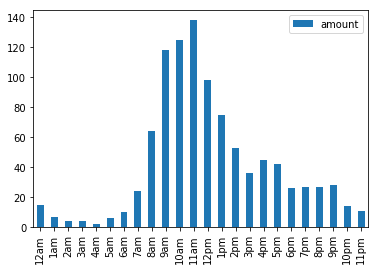

In [15]:
# Plot histogram of time citations were given
df_timess.plot(kind='bar')

f1 = plt.gcf()

# Data Analysis and Results:

In [16]:
#Get averages


In [17]:
#T-Test

#CODE HERE

In [18]:
# Linear Model

#CODE HERE

In [19]:
# Normality Distribution Test

#CODE HERE

In [20]:
# Add more stuff that you think is missing! 

# Conclusions/Discussion:

Write Stuffs here...